In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error,mean_absolute_error 
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV,ElasticNet,ElasticNetCV,LinearRegression
from sklearn.model_selection import train_test_split
sns.set()
import pylab
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import f1_score as f1



In [2]:
df=pd.read_csv("C:\\Users\\yashw\\Downloads\\train.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.isnull().sum()/df.shape[0]*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [5]:
df=df.drop(columns='Cabin')

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df['Age']=df['Age'].fillna(df['Age'].median())

In [8]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [9]:
df.Survived

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

<AxesSubplot:>

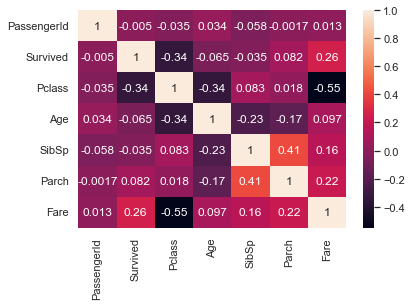

In [10]:
sns.heatmap(df.corr(),annot=True)

In [11]:
df.isnull().sum()/df.shape[0]*100

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

In [12]:
df['Fare']=df['Fare'].fillna(df['Fare'].median())

In [13]:
df['Age']=df['Age'].fillna(df['Age'].median())

In [14]:
df['Survived']=df['Survived'].fillna(df['Survived'].mode()[0])

In [15]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [16]:
df=df.drop(columns='Name')

In [17]:
df=df.drop(columns=['Ticket','Fare','PassengerId'])

In [18]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'], dtype='object')

In [19]:
df['Embarked']=df['Embarked'].replace({'S':0,'C':1,'Q':2})

In [20]:
df['Sex']=df['Sex'].replace({'male':1,'female':0})

In [21]:
l=[]
for i in df['Age']:
    z=(i-df['Age'].min())/(df['Age'].max()-df['Age'].min())
    l.append(z)

In [22]:
l

[0.2711736617240513,
 0.4722292033174164,
 0.32143754712239253,
 0.43453128926866047,
 0.43453128926866047,
 0.3465694898215632,
 0.6732847449107816,
 0.01985423473234481,
 0.33400351847197784,
 0.17064589092736868,
 0.04498617743151546,
 0.7235486303091229,
 0.24604171902488062,
 0.4847951746670017,
 0.17064589092736868,
 0.6858507162603669,
 0.01985423473234481,
 0.3465694898215632,
 0.38426740387031916,
 0.3465694898215632,
 0.43453128926866047,
 0.42196531791907516,
 0.18321186227695402,
 0.3465694898215632,
 0.09525006282985675,
 0.4722292033174164,
 0.3465694898215632,
 0.23347574767529528,
 0.3465694898215632,
 0.3465694898215632,
 0.4973611460165871,
 0.3465694898215632,
 0.3465694898215632,
 0.8240764011058055,
 0.3465694898215632,
 0.5224930887157577,
 0.3465694898215632,
 0.2586076903744659,
 0.22090977632570996,
 0.17064589092736868,
 0.4973611460165871,
 0.33400351847197784,
 0.3465694898215632,
 0.032420206081930136,
 0.23347574767529528,
 0.3465694898215632,
 0.346569489

In [23]:
df['Scaled_Age']=pd.Series(l)

In [24]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Scaled_Age
0,0,3,1,22.0,1,0,0,0.271174
1,1,1,0,38.0,1,0,1,0.472229


In [25]:
df.drop(columns='Age',inplace=True)

In [26]:
X=df.drop(columns='Survived')
Y=df['Survived']

In [27]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25,random_state=1200)

In [28]:
df.columns


Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked',
       'Scaled_Age'],
      dtype='object')

In [29]:
lm=LogisticRegression()
lm.fit(x_train,y_train)


LogisticRegression()

In [30]:
y_pred=lm.predict(x_test)

In [31]:
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0], dtype=int64)

In [32]:
accuracy_score(y_test,y_pred)

0.7713004484304933

In [33]:
df

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Scaled_Age
0,0,3,1,1,0,0,0.271174
1,1,1,0,1,0,1,0.472229
2,1,3,0,0,0,0,0.321438
3,1,1,0,1,0,0,0.434531
4,0,3,1,0,0,0,0.434531
...,...,...,...,...,...,...,...
886,0,2,1,0,0,0,0.334004
887,1,1,0,0,0,0,0.233476
888,0,3,0,1,2,0,0.346569
889,1,1,1,0,0,1,0.321438


In [34]:
confusion_matrix(y_test,y_pred)

array([[116,  26],
       [ 25,  56]], dtype=int64)

In [35]:
 auc=roc_auc_score(y_test,y_pred)

In [36]:
auc

0.7541297165710311

In [37]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred)

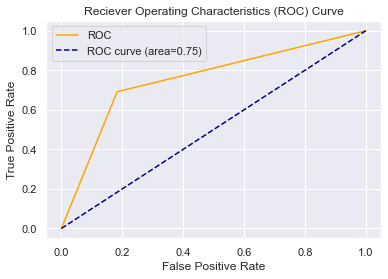

In [38]:
plt.plot(fpr,tpr,color='orange',label="ROC")
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve (area=%0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characteristics (ROC) Curve')
plt.legend()
plt.show()

In [39]:
f1(y_test,y_pred)

0.6871165644171778

In [40]:
auc

0.7541297165710311